# Netflix Movies & TV Shows — SQL + Python Analysis
This notebook demonstrates exploratory analysis using **MySQL** for queries and **Pandas / NumPy / Matplotlib / Seaborn** for analysis and visualization.


First, we import necessary libraries for data analysis and visualization, and establish a connection to our MySQL database where the Netflix dataset is stored and we fetch the Netflix titles dataset from MySQL into a Pandas DataFrame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Setup plots
plt.style.use("ggplot")
sns.set_palette("pastel")

# MySQL connection
username = "root"
password = "0007"
host = "localhost"
port = "3306"
database = "netflix_db"

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}")

df = pd.read_sql("SELECT * FROM netflix_titles;", engine)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Initial exploration: dataset size, column names, missing values, and data types.

In [8]:
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Comparison of how many movies vs tv shows are available on Netflix.

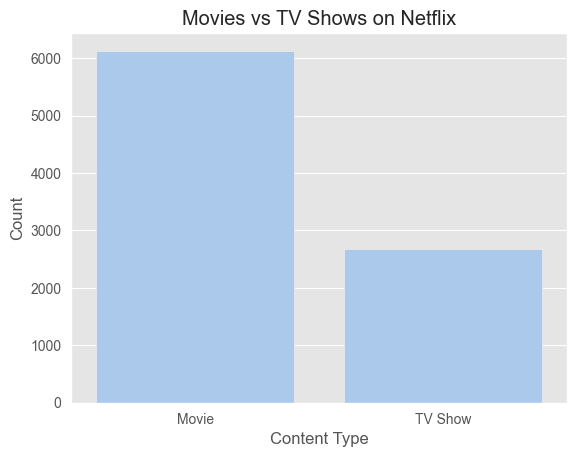

In [11]:
df_type = pd.read_sql("""
    SELECT type, COUNT(*) as total
    FROM netflix_titles
    GROUP BY type;
""", engine)

sns.barplot(data=df_type, x="type", y="total")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

Top 10 countries which produce the most content available on Netflix.

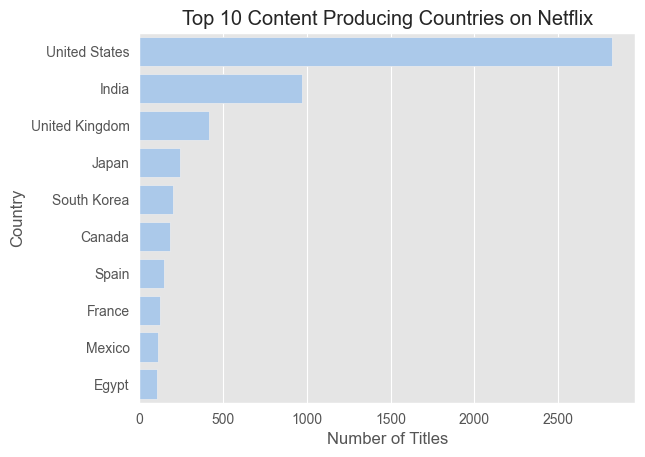

In [12]:
df_countries = pd.read_sql("""
    SELECT country, COUNT(*) as total
    FROM netflix_titles
    WHERE country IS NOT NULL
    GROUP BY country
    ORDER BY total DESC
    LIMIT 10;
""", engine)

sns.barplot(data=df_countries, x="total", y="country")
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

Trend of titles that have been added to Netflix over the years

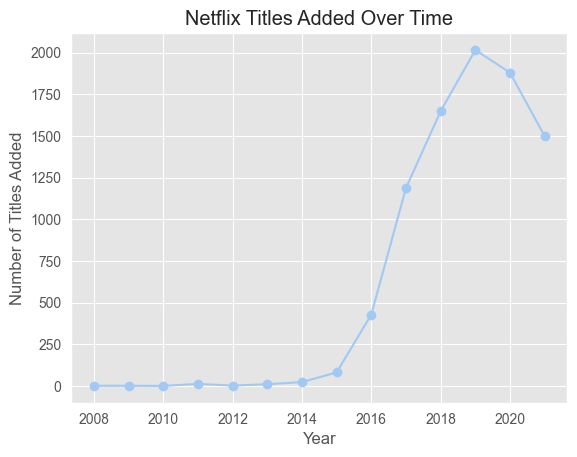

In [13]:
df_years = pd.read_sql("""
    SELECT YEAR(STR_TO_DATE(date_added, '%M %d, %Y')) AS year_added, COUNT(*) as total
    FROM netflix_titles
    WHERE date_added IS NOT NULL
    GROUP BY year_added
    ORDER BY year_added;
""", engine)

plt.plot(df_years["year_added"], df_years["total"], marker="o")
plt.title("Netflix Titles Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

Top 10 Genres

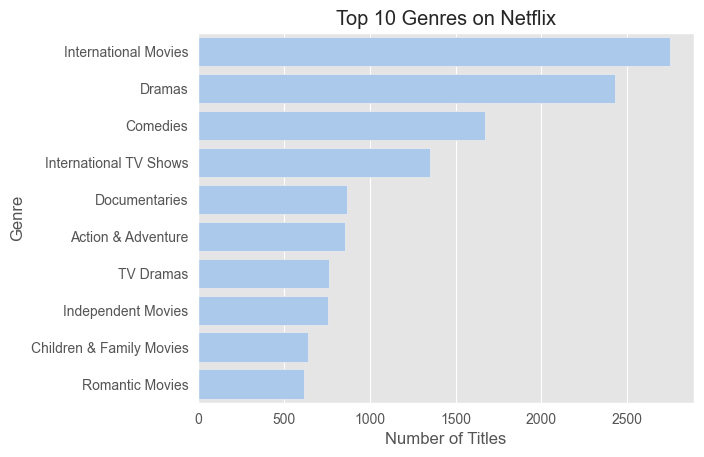

In [14]:
df_genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
df_genres = df_genres['genre'].value_counts().reset_index()
df_genres.columns = ["genre", "count"]

sns.barplot(data=df_genres.head(10), x="count", y="genre")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

Top Directors & Top Actors

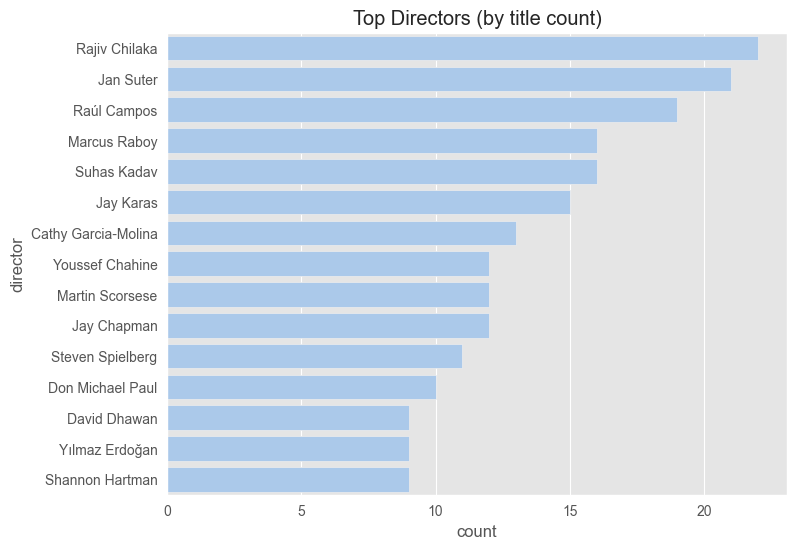

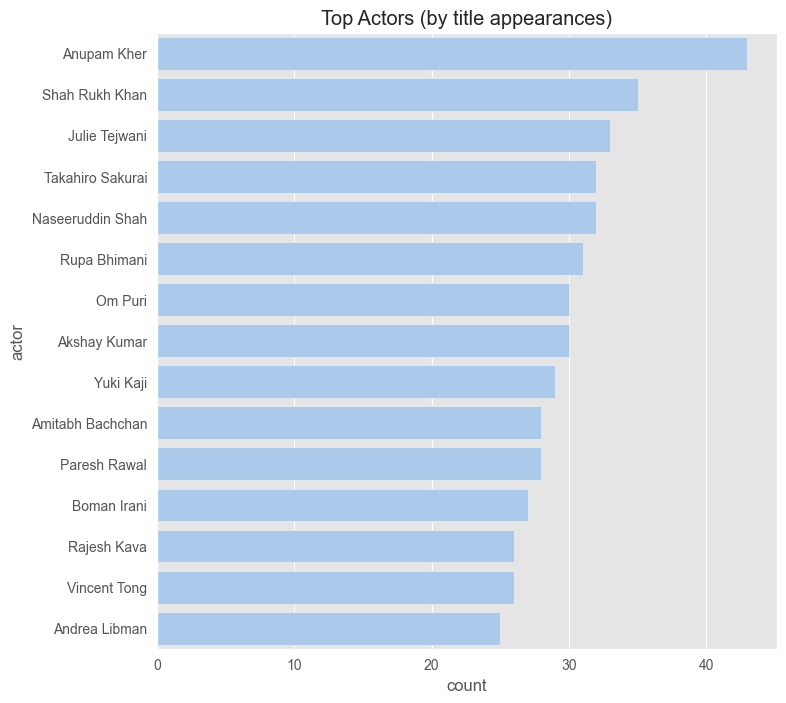

In [18]:
directors = df[['show_id','director']].dropna()
directors['director_list'] = directors['director'].str.split(',\\s*', regex=True)
directors = directors.explode('director_list')
directors['director_list'] = directors['director_list'].str.strip()

top_directors = directors['director_list'].value_counts().reset_index().head(15)
top_directors.columns = ['director','count']

plt.figure(figsize=(8,6))
sns.barplot(data=top_directors, x='count', y='director')
plt.title("Top Directors (by title count)")
plt.show()

# Top actors (cast) — explode
casts = df[['show_id','cast']].dropna()
casts['cast_list'] = casts['cast'].str.split(',\\s*', regex=True)
casts = casts.explode('cast_list')
casts['cast_list'] = casts['cast_list'].str.strip()

top_actors = casts['cast_list'].value_counts().reset_index().head(20)
top_actors.columns = ['actor','count']

plt.figure(figsize=(8,8))
sns.barplot(data=top_actors.head(15), x='count', y='actor')
plt.title("Top Actors (by title appearances)")
plt.show()

In this beginner-level project, we combined SQL and Python to analyze the Netflix dataset. Using MySQL for querying and Pandas/Seaborn for visualization, we discovered:

1. Movies dominate over TV Shows on Netflix.
2. The USA and India are leading producers of Netflix content.
3. The platform has grown rapidly since 2015.
4. Popular genres include Dramas, Comedies, and International Movies.
5. Top Directors are Rajiv Chilaka and Jan Suter whereas Top Actors include Anupam Kher and Shah Rukh Khan

This project demonstrates how SQL can be effectively combined with Python’s data science stack for practical analytics.